In [1]:
import torch
from torch import nn
from torch import optim
from matplotlib import pyplot as plt

import numpy as np
import seaborn as sns
sns.set()

plt.rcParams["figure.figsize"] = (14.0, 7.0)

In [2]:
def make_net(hidden_depth, width):
    assert hidden_depth >= 1
    yield nn.Linear(1, width)
    yield nn.ReLU()
    for i in range(hidden_depth-1):
        yield nn.Linear(width, width)
        yield nn.ReLU()
    yield nn.Linear(width, 1)


In [3]:
# make a closure?

def make_predictor(x, y):
    xt = x.clone()
    yt = y.clone()
    def get_pred(hidden, width, nepoch=100, lr=0.002, momentum=0.9, debug=False):
        net = nn.Sequential(*make_net(hidden, width))
        lossfunc = nn.MSELoss()
        optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

        og_loss = lossfunc(net(xt), yt)
        for epoch in range(nepoch):
            optimizer.zero_grad()
            ypred = net(xt)
            loss = lossfunc(ypred, yt)
            if debug: print(epoch, loss)
            loss.backward()
            optimizer.step()
        if debug: print(f"First loss {og_loss} v final {loss}")
        return ypred.detach(), loss.item()
    return get_pred

# get_pred();

In [4]:
xt = torch.linspace(-1, 3, 81).unsqueeze(-1)
yt = torch.exp(xt)
xd = xt.detach()
yd = yt.detach()
get_pred = make_predictor(xt, yt)

In [5]:
def make_plots(numplots=50, debug=False, **predkwargs):
    plt.title(f"Approximating exponential with {predkwargs['hidden']} hidden layer, {predkwargs['width']} width")
    plt.plot(xd, yt.detach(), ".", label="Actual")
    loss_list = []
    predkwargs["debug"] = debug
    for num in range(numplots):
        yval, loss = get_pred(**predkwargs)
        if np.isnan(loss):
            raise RuntimeError("Nan loss")
        if debug:
            print(num, loss)
        loss_list.append(loss)
        plt.plot(xd, yval, label=f"pred {num}")

# Effect of width



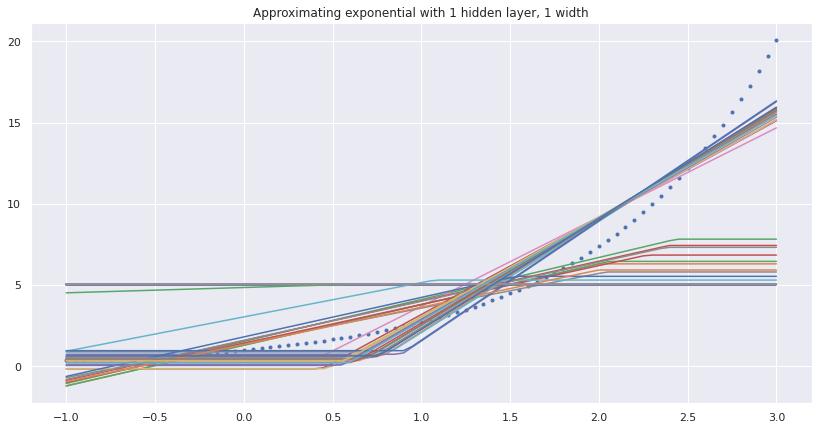

In [6]:
make_plots(hidden=1, width=1, lr=0.002)

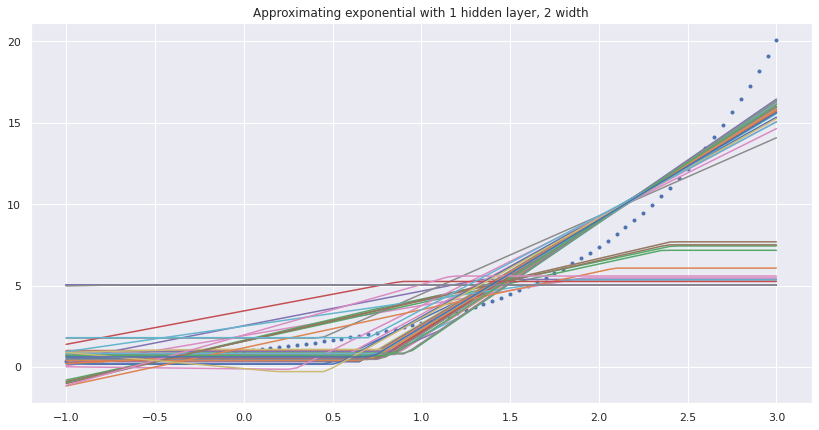

In [7]:
make_plots(hidden=1, width=2, lr=0.002)

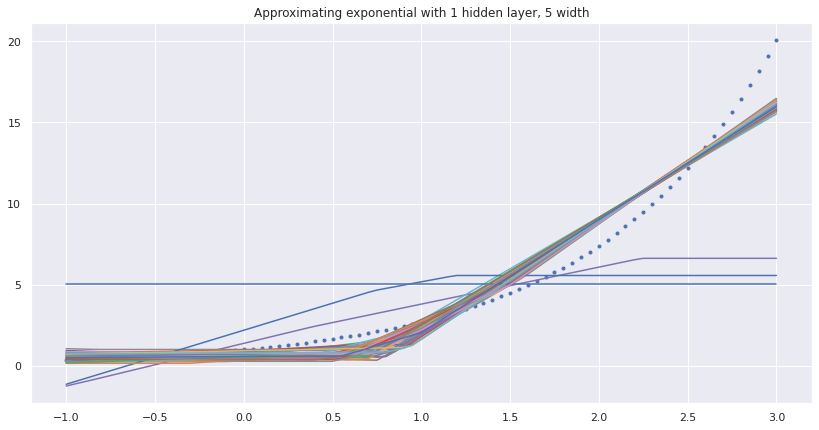

In [8]:
make_plots(hidden=1, width=5, lr=0.002)

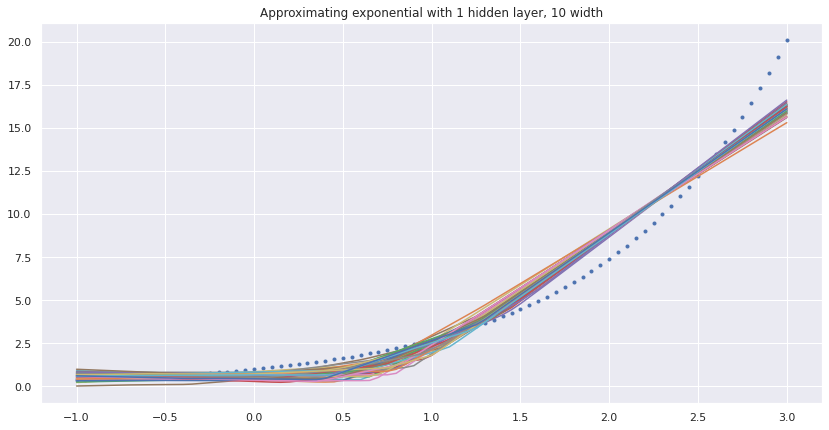

In [9]:
make_plots(hidden=1, width=10, lr=0.002)

# Effect of Depth

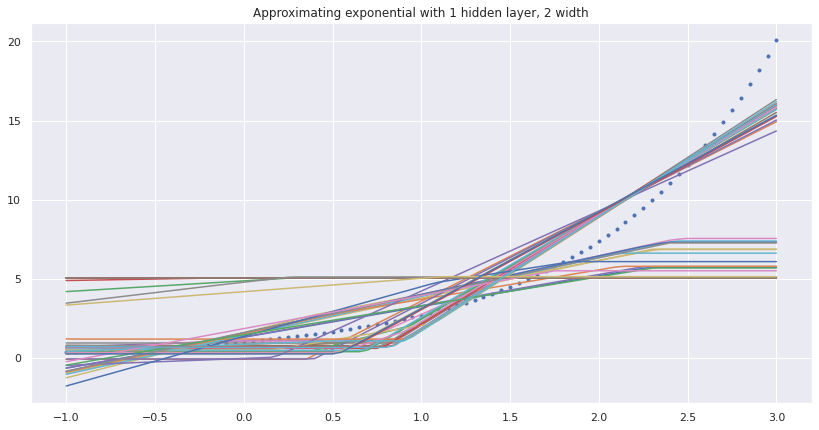

In [10]:
make_plots(hidden=1, width=2, lr = 0.002)

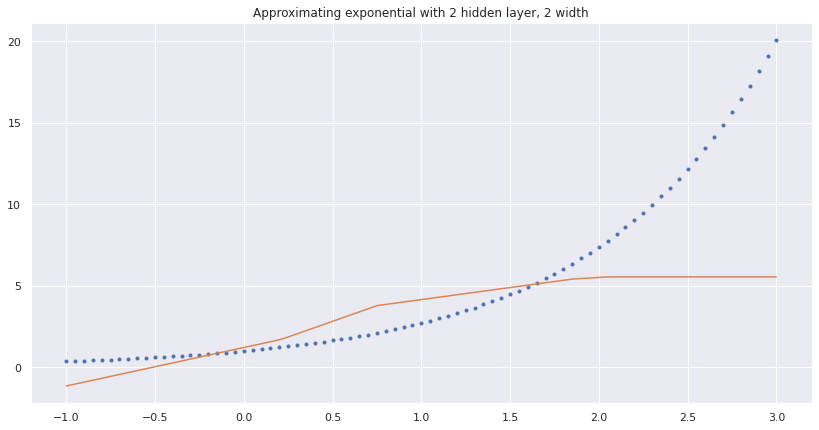

In [11]:
make_plots(hidden=2, width=2, numplots=1)

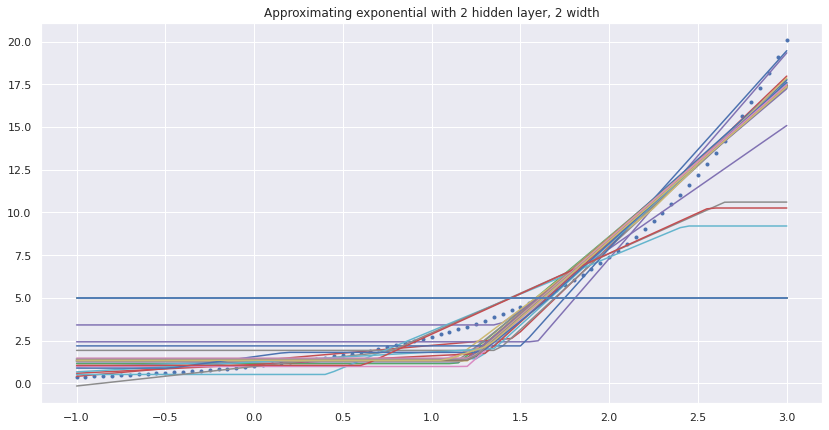

In [12]:
make_plots(hidden=2, width=2, lr=0.004)

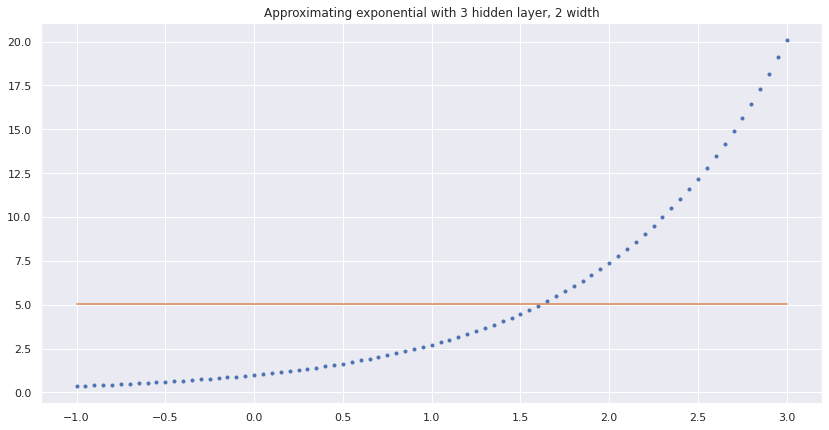

In [13]:
make_plots(hidden=3, width=2, numplots=1)

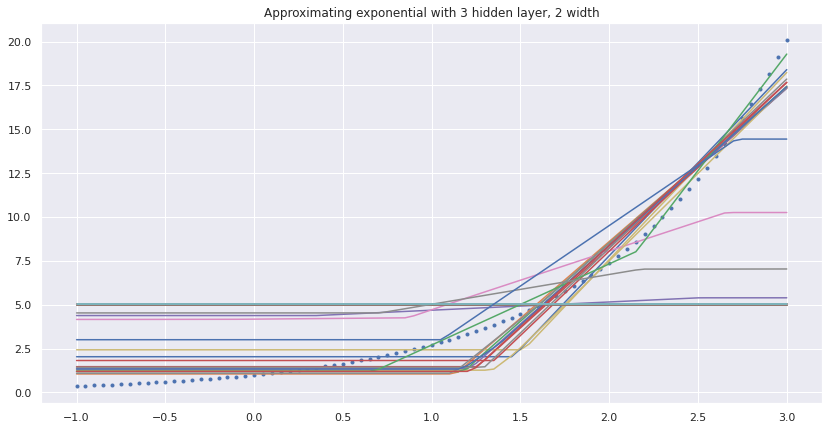

In [14]:
make_plots(hidden=3, width=2)

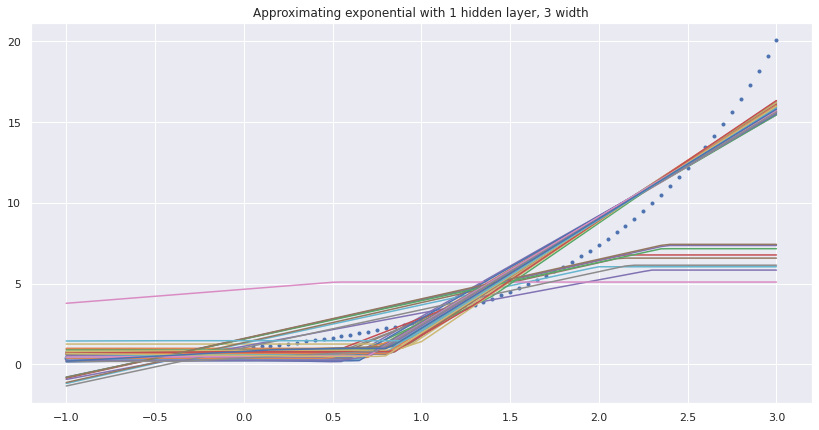

In [15]:
make_plots(hidden=1, width=3)

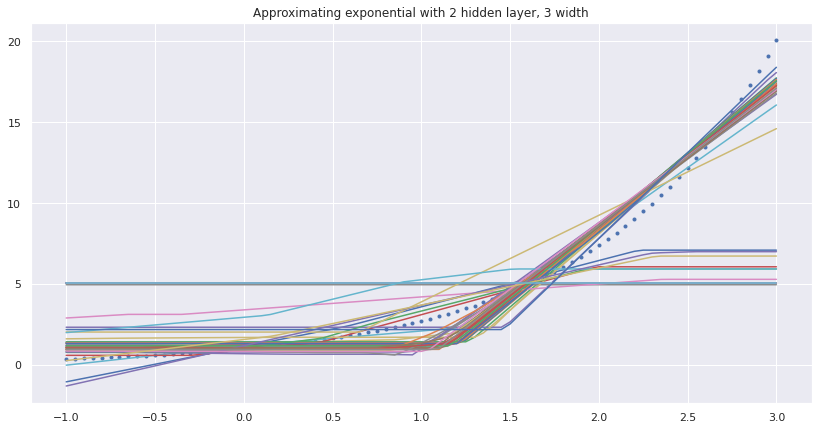

In [16]:
make_plots(hidden=2, width=3)

## Extend the training domain.

In [17]:
xt = torch.linspace(-5, 5, 101).unsqueeze(-1)
yt = torch.exp(xt)
xd = xt.detach()
yd = yt.detach()
get_pred = make_predictor(xt, yt)

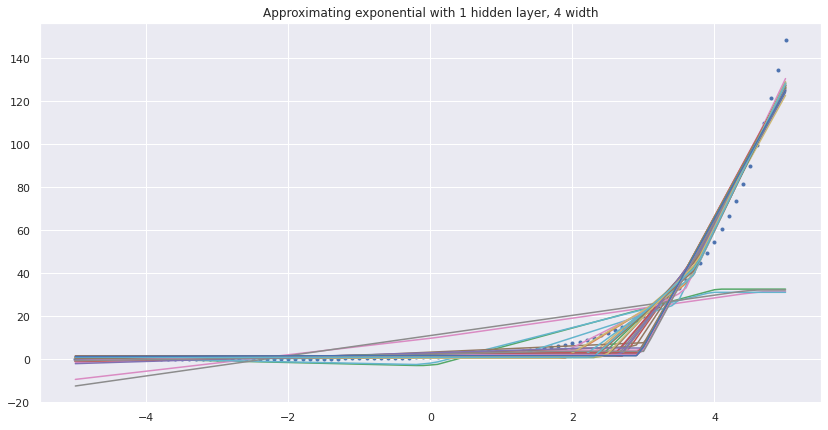

In [25]:
make_plots(hidden=1,width=4)

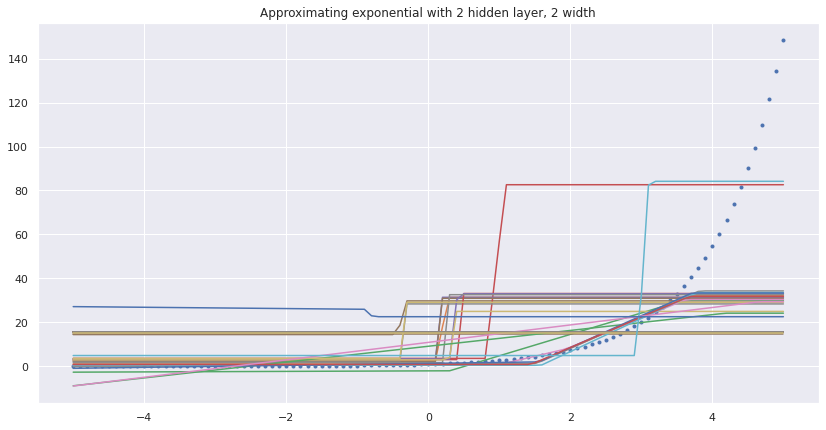

In [26]:
make_plots(hidden=2,width=2)

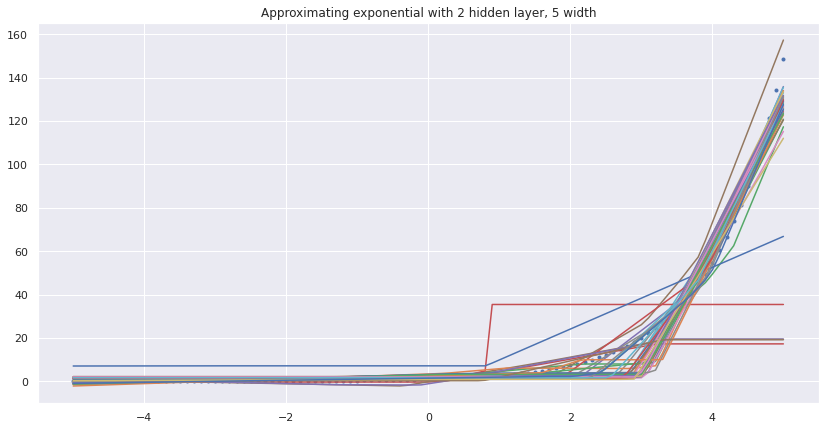

In [20]:
make_plots(hidden=2,width=5, lr=0.001)

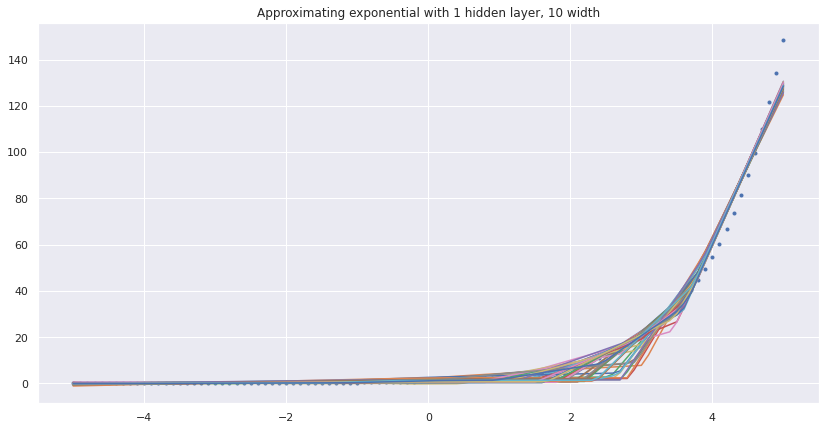

In [21]:
make_plots(hidden=1,width=10)

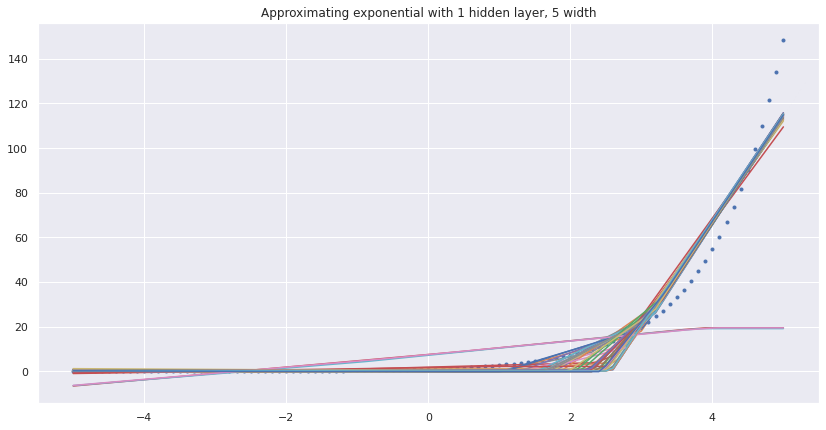

In [22]:
make_plots(hidden=1,width=5, lr=0.001)